In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [24]:
data = data.drop(columns=['id'])

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [25]:
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [30]:
knn = KNeighborsClassifier(n_neighbors=5)
rf = RandomForestClassifier(random_state=42)

In [31]:
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [33]:
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

In [34]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

accuracy_knn

0.9473684210526315

In [36]:
accuracy_rf

0.9649122807017544

In [38]:
report_knn

{'0': {'precision': 0.9577464788732394,
  'recall': 0.9577464788732394,
  'f1-score': 0.9577464788732394,
  'support': 71.0},
 '1': {'precision': 0.9302325581395349,
  'recall': 0.9302325581395349,
  'f1-score': 0.9302325581395349,
  'support': 43.0},
 'accuracy': 0.9473684210526315,
 'macro avg': {'precision': 0.9439895185063871,
  'recall': 0.9439895185063871,
  'f1-score': 0.9439895185063871,
  'support': 114.0},
 'weighted avg': {'precision': 0.9473684210526315,
  'recall': 0.9473684210526315,
  'f1-score': 0.9473684210526315,
  'support': 114.0}}

In [37]:
report_rf

{'0': {'precision': 0.958904109589041,
  'recall': 0.9859154929577465,
  'f1-score': 0.9722222222222222,
  'support': 71.0},
 '1': {'precision': 0.975609756097561,
  'recall': 0.9302325581395349,
  'f1-score': 0.9523809523809523,
  'support': 43.0},
 'accuracy': 0.9649122807017544,
 'macro avg': {'precision': 0.9672569328433009,
  'recall': 0.9580740255486406,
  'f1-score': 0.9623015873015872,
  'support': 114.0},
 'weighted avg': {'precision': 0.9652053622194477,
  'recall': 0.9649122807017544,
  'f1-score': 0.9647382344750765,
  'support': 114.0}}

In [49]:
import pandas as pd

summary_data = {
    "Metric": ["Accuracy", "Precision (B)", "Recall (B)", "F1-Score (B)",
               "Precision (M)", "Recall (M)", "F1-Score (M)"],
    "KNN": [
        accuracy_knn,
        report_knn['0']['precision'],
        report_knn['0']['recall'],
        report_knn['0']['f1-score'],
        report_knn['1']['precision'],
        report_knn['1']['recall'],
        report_knn['1']['f1-score']
    ],
    "Random Forest": [
        accuracy_rf,
        report_rf['0']['precision'],
        report_rf['0']['recall'],
        report_rf['0']['f1-score'],
        report_rf['1']['precision'],
        report_rf['1']['recall'],
        report_rf['1']['f1-score']
    ]
}

summary_data = pd.DataFrame(summary_data)



In [50]:
summary_data 

,Metric,KNN,Random Forest
0,Accuracy,0.947368,0.964912
1,Precision (B),0.957746,0.958904
2,Recall (B),0.957746,0.985915
3,F1-Score (B),0.957746,0.972222
4,Precision (M),0.930233,0.975610
5,Recall (M),0.930233,0.930233
6,F1-Score (M),0.930233,0.952381


In [41]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)


In [42]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [47]:
summary_data = {
    "Metric": ["Accuracy", "Precision (B)", "Recall (B)", "F1-Score (B)",
               "Precision (M)", "Recall (M)", "F1-Score (M)"],
    "KNN": [
        accuracy_knn,
        report_knn['0']['precision'],
        report_knn['0']['recall'],
        report_knn['0']['f1-score'],
        report_knn['1']['precision'],
        report_knn['1']['recall'],
        report_knn['1']['f1-score']
    ],
    "Random Forest": [
        accuracy_rf,
        report_rf['0']['precision'],
        report_rf['0']['recall'],
        report_rf['0']['f1-score'],
        report_rf['1']['precision'],
        report_rf['1']['recall'],
        report_rf['1']['f1-score']
    ]
}

summary_data = pd.DataFrame(summary_data)

In [48]:
summary_data

,Metric,KNN,Random Forest
0,Accuracy,0.947368,0.964912
1,Precision (B),0.957746,0.958904
2,Recall (B),0.957746,0.985915
3,F1-Score (B),0.957746,0.972222
4,Precision (M),0.930233,0.975610
5,Recall (M),0.930233,0.930233
6,F1-Score (M),0.930233,0.952381


In [51]:
print("🔍 Confusion Matrix - KNN:\n", cm_knn)

🔍 Confusion Matrix - KNN:
 [[68  3]
 [ 3 40]]


In [52]:
print("🔍 Confusion Matrix - Random Forest:\n", cm_rf)

🔍 Confusion Matrix - Random Forest:
 [[70  1]
 [ 3 40]]


In [55]:
best_model = "Random Forest" if accuracy_rf > accuracy_knn else "KNN"
print(f"\n✅ Best model based on accuracy: {best_model}")


✅ Best model based on accuracy: Random Forest


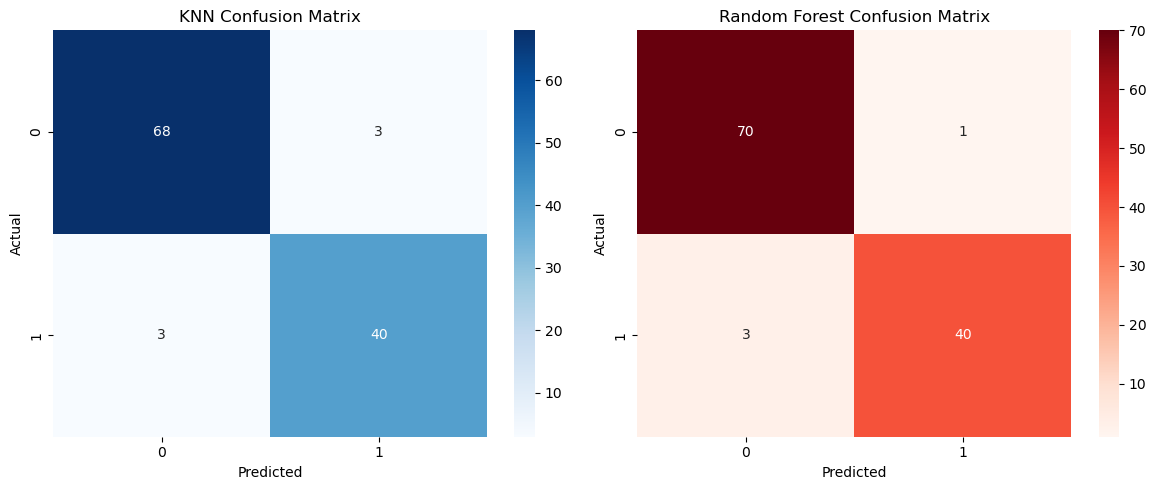

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("KNN Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axs[1])
axs[1].set_title("Random Forest Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()



C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\Temp\ipykernel_11600\122109076.py:14: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\SAMUEL NURUDEEN TARI\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


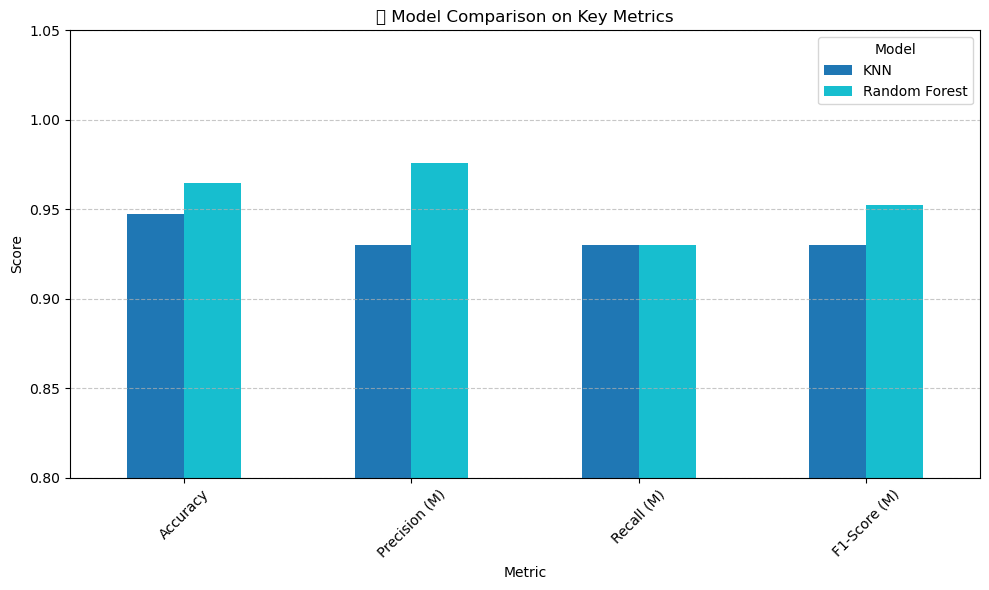

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ["Accuracy", "Precision (M)", "Recall (M)", "F1-Score (M)"]
plot_data = summary_data[summary_data["Metric"].isin(metrics)].set_index("Metric")

plot_data.plot(kind='bar', figsize=(10, 6), colormap='tab10')
plt.title("📊 Model Comparison on Key Metrics")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=45)
plt.legend(title="Model")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()